<a href="https://colab.research.google.com/github/Gulwalishah/ML_Test/blob/main/Histopolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

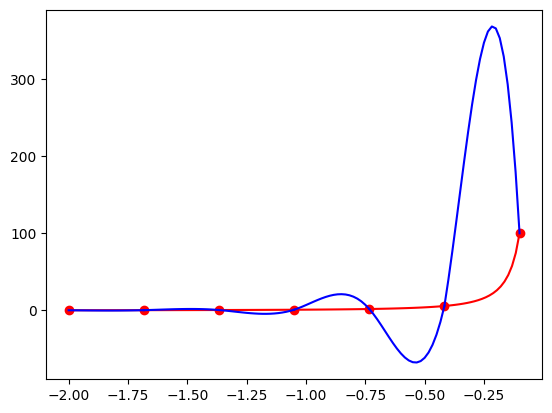

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def cubic_spline(n):
    a = -2
    b = -0.1
    h = (b - a) / n
    x = np.linspace(a, b, n+1)

    # Define values y(i)
    y = [f(xi) for xi in x]
    plt.plot(x, y, 'or')  # Plot interpolation knots

    x0 = np.linspace(a, b, n*20+1)
    y0 = [f(xi) for xi in x0]
    plt.plot(x0, y0, 'r')  # Plot initial function

    d = np.zeros(n+1)
    for i in range(1, n):
        d[i] = 6 / h**2 * (y[i+1] - 2 * y[i] + y[i-1])
    d[0] = ddf(a)
    d[n] = ddf(b)

    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = 4
        A[i, i+1] = 1

    M = solve(A, -d)

    for i in range(1, n+1):
        xx = np.linspace(x[i-1], x[i], 20)
        yy = [s(xi, M, h, x, y, i) for xi in xx]
        plt.plot(xx, yy, '-b')

    plt.show()

def f(x):
    return 1 / x**2

def ddf(x):
    return 6 / x**4

def s(t, M, h, x, y, i):
    return (
        M[i-1] * (x[i] - t)**3 / 6 / h +
        M[i] * (t - x[i-1])**3 / 6 / h +
        (y[i-1] - M[i-1] * h**2 / 6) * ((x[i] - t) / h) +
        (y[i] - M[i] * h**2 / 6) * ((t - x[i-1]) / h)
    )

cubic_spline(6)
